In [60]:
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
# change current working directory
import os
os.chdir('/content/drive/MyDrive/AI/1CWK100/')

In [62]:
# check we can see the dataset
os.path.isfile('pneumonia_raw.csv')

True

What is Cross-Validation?

  Cross-validation is a statistical method used in machine learning to assess the performance and generalizability of a model, the model performance and prevent overfitting. It involves splitting the available data into subsets to train and evaluate the model on different partitions, helping ensure that the model performs well on unseen data.


What is K-Fold?
  
  K-Fold Validation splits data into kk subsets, training on k−1k-1 and validating on the rest, repeating kk times. Essentially it  ensures reliable performance estimates, prevents overfitting, and maximizes data use.

What is Type 1 and Type 2 errors?

Type 1 (False postive) -  Occurs when the model incorrectly identifies a negative instance as positive; so in this case, falsely predicting if a person has pneumonia when they do not.

Type 2 (False Negative) - Occurs when the model incorrectly identifies a positive instance as negative; so in this case, falsely saying someone doesn't have pneumonia when they do.

# Dataset preparation
**Why clean the data, and what recipe is used and why?**

Cleaning data Is a given as within machine learning noisy data or erroneous can lead a to biased unreliable models; especially in cases of supervised learning, garbage in, garbage out, also leading to a degradation to performance of a model (Ilyas & Chu, 2019). Within medical diagnosis datasets, it’s imperative that all plausible variables have been considered; In In binary classification, misclassifications, such as failing to identify pneumonia when it is present (false negatives) or diagnosing pneumonia when it isn’t (false positives), also known as Type 1 and Type 2 errors (I’ll discuss these in more depth within each model, when appropriate).

Something else to lookout for is Overfitting, the dataset includes numerical features that likely have varying scales. If left unscaled, certain features could disproportionately influence the models. Without scaling, the model might overemphasize certain features and targets, increasing its computational complexity (Lee, et al., 2024). Plus, imbalanced class distributions, where one class (e.g., "Patient_ID") significantly outweighs the other. Overfitting occurs when a model doesn’t just learn the overall patterns but also starts to pick up on the noise and random oddities in the training data, leading to where it performs well on the training set but struggles with new, unseen data (AWS - Amazon, n.d.).

My code lays claim to a few types to prevent overfitting: one of these methods is using stratified sampling, which ensures that the class distribution in the training and test sets is consistent. StandardScaler is also used to scale the numerical features, ensuring no single feature dominates, as well as removing superfluous columns, e.g., Patient_ID. Overfitting has also been tackled further with methods like K-fold cross-validation (seek code comments for further information).

In [63]:
# data preparation steps
# Importing the packages we use
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

#LOAD the dataset
observation = pd.read_csv('pneumonia_raw.csv')

#inspecting said data
print("Data overview:")
print(observation.info())

print("\nFirst few rows:")
print(observation.head())

#clean the data and missing values
observation = observation.drop_duplicates()
print("\nData after removing duplicates:", observation.shape)

missing_counts = observation.isnull().sum()
print("\nMissing values per column:")
print(missing_counts)

#Pnemonia to binary 1 = yes; 0 = no + variables
observation['Pneumonia'] = LabelEncoder().fit_transform(observation['Pneumonia'])
print("\nDistrobution in siad 'Pneumonia': ")
print(observation['Pneumonia'].value_counts())

#stat sampling + minimum number needed to start it
min_samples = 2
class_counts = observation['Pneumonia'].value_counts()
valid_classes = class_counts[class_counts >= min_samples].index
observation = observation[observation['Pneumonia'].isin(valid_classes)]
print("\nFiltered class distribution:")
print(observation['Pneumonia'].value_counts())

#Separate features and target variable + SCALER
#Everything below essentially is reducing noise and a egalitarian prepresentation to the best of my ablity
X = observation.drop(columns=['Patient_ID' , 'Pneumonia']) #feature X is separted for target variable
y = observation['Pneumonia']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#split said data using stratified sampling
#applying a minimum sample threshold, enures that only suffcient representation is kept
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)
for train_index, test_index in stratified_split.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


print("\n Data preparation summary")
print("Training data shape:", X_train.shape)
print("Test data shape: ", X_test.shape)
print("\n distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\n distribution in test set")
print(y_test.value_counts(normalize=True))



Data overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                584 non-null    int64  
 1   Patient_Age               584 non-null    int64  
 2   Male                      584 non-null    float64
 3   Xray_Brightness           584 non-null    float64
 4   Xray_Contrast             584 non-null    float64
 5   Silhouette_Sign           584 non-null    int64  
 6   Max_Consolidation_Width   584 non-null    int64  
 7   Max_Consolidation_Height  584 non-null    int64  
 8   Cavity_Presence           584 non-null    float64
 9   Fluid_Level               584 non-null    float64
 10  Air_Bronchograms          584 non-null    float64
 11  Pneumonia                 584 non-null    object 
dtypes: float64(6), int64(5), object(1)
memory usage: 54.9+ KB
None

First few rows:
   Patient_ID  Patient_Ag

<ipython-input-63-f82e3dba8058>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  observation['Pneumonia'] = LabelEncoder().fit_transform(observation['Pneumonia'])


## Visualization of data after processing

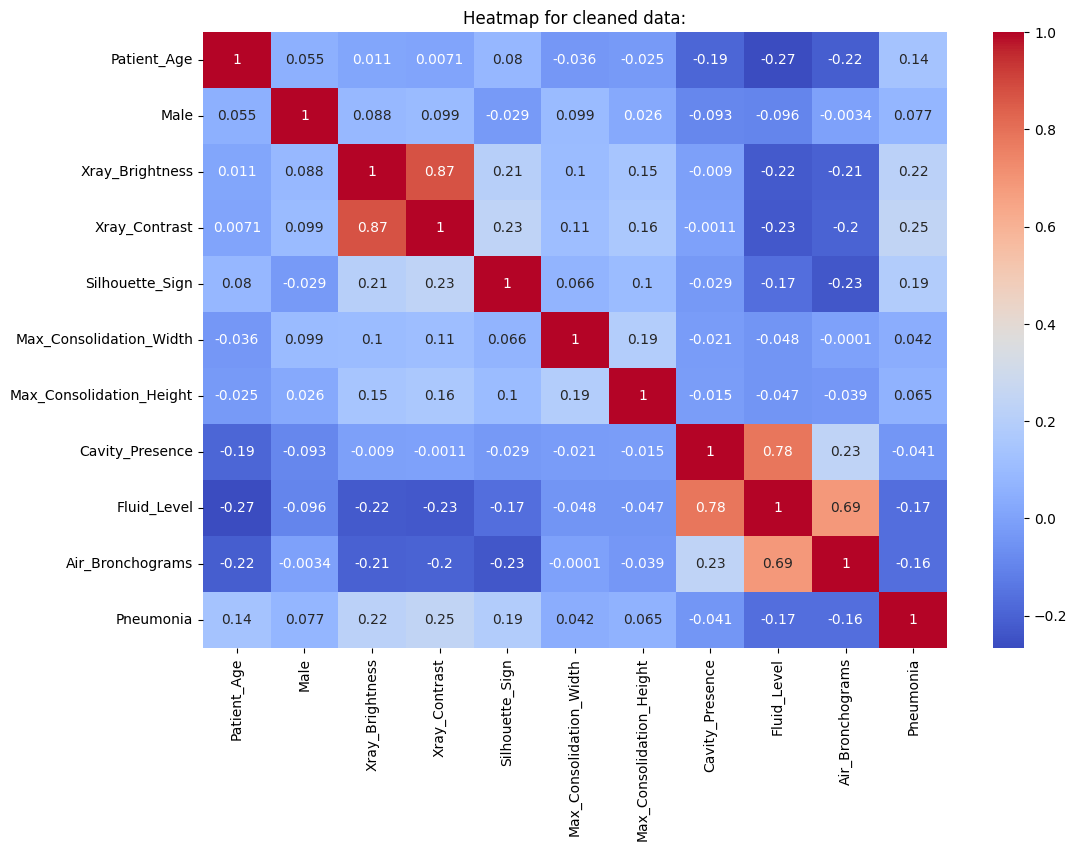

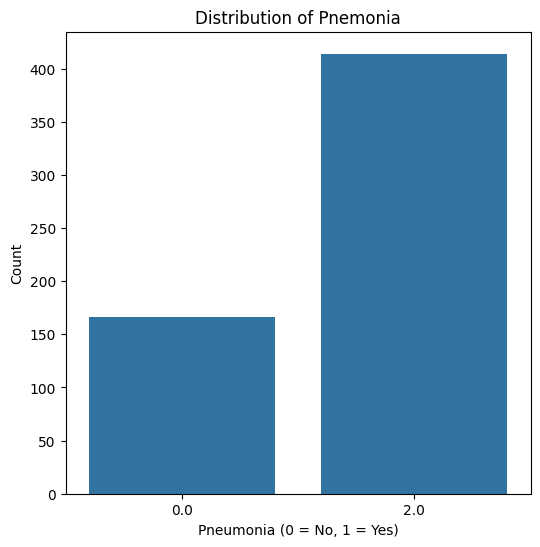

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Reload cleaned dataset
X_df = pd.DataFrame(X_scaled, columns=X.columns)
X_df['Pneumonia'] = y # Data frame from scaled features


plt.figure(figsize=(12, 8)) #Figure size for visibility
corrlation_matrix = X_df.corr()
sns.heatmap(corrlation_matrix, annot=True, cmap='coolwarm') # Plotting the heat map
plt.title('Heatmap for cleaned data:') #title
plt.show() #Showing the map

plt.figure(figsize=(6, 6)) #figure size
sns.countplot(x='Pneumonia', data=X_df)
plt.title('Distribution of Pnemonia')
plt.xlabel('Pneumonia (0 = No, 1 = Yes)') # Labeling the X-axis
plt.ylabel('Count')
plt.show()


# #visualize relationships between features and target
# plt.figure(figsize=(12, 6))
# # sns.pairplot(X_df, hue='Pneumonia', markers=['o', 's'], plot_kws={'alpha': 0.5})
# # plt.suptitle('Features and target (Pneumonia)', y=1.02)
# plt.show("\n")


The heatmap should shows the correlataion between different features after cleaning said the data. Features with strong or negative correlations, that being target varibale of "Pneumonia". Higher correlation values, i.e., within the range of -1 to 1, are indicative of the strength and direction of the linear relationship between features and the target. This information can be useful for informing selection decisions regarding which models might be used later on.


#  DecisionTreeClassifier(Model 1)




Defines and evaluates an ensemble learning model using a bagging approach with a DecisionTreeClassifier as the base estimator, fine-tuned with hyperparameters like max_depth, min_samples_split, and min_samples_leaf. It uses k-fold cross-validation to assess the model's accuracy and averages the scores for a reliable estimate of its performance.

In [65]:
# will be using

import os
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score


#base model
base_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=42) # explain why in explantion// maximum depth stop overfitting## tree depth=n?
#Setting up hyperparamters           .Below model that will be used within each subset of data to create each Decision Tree in the ensemble
#add more hyperparameters? i.e, min_sample, max_features ect
ensemble_model = BaggingClassifier(estimator=base_model, n_estimators=200, max_samples=0.9, random_state=42)    #0.8 amd other numbers are used as percentage, random smampled #100 tree ensemble + random

#Evalute said moodel using k-fold cross
#crossVal  splitting data in 5 parts
crossVal_score = cross_val_score(ensemble_model , X_train, y_train, cv=5, scoring="accuracy") #evaluate how well the ensemble model generalizes across different subsets of the training data

#output score of corssVal and average
print("\n Crossvaldiation accuracy scores for given gold: ", crossVal_score)
print("\n Average crossvaldiation accuracy score: ", np.mean(crossVal_score))

#ADD PRE
#F1


 Crossvaldiation accuracy scores for given gold:  [0.57142857 0.77142857 0.67142857 0.72857143 0.60869565]

 Average crossvaldiation accuracy score:  0.6703105590062112


Handles missing values in the training and testing datasets by dropping rows with NaN values, trains the ensemble model on the cleaned training data,and evaluates its performance on the test set using accuracy as the metric. Finally, it prints the accuracy of the model's predictions on the test dataset.

In [66]:
from sklearn.metrics import accuracy_score

if y_train.isnull().any() or y_test.isnull().any():
    # print("NaN values found in target variables after splitting")
    # drop rows w/ NaN values in y_train//y_test + Cleaning data
    X_train, y_train = X_train[~y_train.isnull()], y_train.dropna() #NaN values that is in Y_train; adjusting both y/x_train # I am doing .isnull does a boolean where true = NaN in train
    X_test, y_test = X_test[~y_test.isnull()], y_test.dropna() # Similar to ^^^

#ensemble model on the full training
ensemble_model.fit(X_train, y_train)
# Predict on the test set
y_pred = ensemble_model.predict(X_test)
#cal the acc on the test set
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of set test:", test_accuracy)

Accuracy of set test: 0.703862660944206


### Interpreting the results

```
Crossvaldiation accuracy scores for given gold:  [0.57142857 0.77142857 0.67142857 0.72857143 0.60869565]
```
The model's performance varies across various training subsets, as indicated by the cross-validation accuracy scores, which varies from 0.571 to 0.771. The variance suggests the particular data distribution in each fold affects the effectiveness of the model, potentially as a result of class imbalance.

```
 Average crossvaldiation accuracy score:0.6703105590062112 (67%)
```
The model's capacity to adapt to various subsets of training data is shown by its average cross-validation accuracy of 67%. Far from great it shows that the model outperforms random speculating.
```
Accuracy of set test: 0.703862660944206 (70.3%)
```

The test set accuracy of 0.7039 demonstrates how well the model performs on unseen data and beats the cross-validation accuracy (0.7039 > 0.6703), demonstrating good generalization. The similarity between these two metrics suggests that the model bypassed overfitting the training data.

Test set accuracy of 70.38% means that the model correctly classified 70.38%(ish) of the Pneumonia cases in unseen data, showing how effective it is on new, untrained samples

# KNeighborsClassifier (Model 2)

Evaluation:

The accuracy of my KNeighborsClassifier model is between 69 and 72 percent, which is an adequate performance relative to other models. It seems to me that while it's relatively effective, there is still room for improvement. The constraints of using structured numerical data as input are also shown in this performance, even if it shows that the model can categorize pneumonia cases with a respectable "success?" The model's accuracy-recall trade-off draws notice to an uncomfortable substrate: maintaining high recall to identify as many real pneumonia cases as possible frequently comes at the expense of lesser precision, which could result in false positives. In the medical field, where false positives may result in needless treatments and false negatives may cause treatment for urgent patients to be delayed, this trade-off is especially signicant and can't be hand waved away.

Initializes and tunes a K-Nearest Neighbors (KNN) classifier using a pipeline that includes potential, then performs hyperparameter optimization with GridSearchCV and stratified K-fold cross-validation to find the best model parameters.

In [67]:
# Evaluate model 2:
#import
#hyper paramaters needed
#cross val into this code block or another, will decide later
#get model
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


# feature scaling
# removes correlations between feature, reducing reduancy of information which isn't needed/useless
# pca = PCA(n_components=5)  # Principal component analysis, keeps as much varinace as possible, whilst also transforming old dataset to new
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)

#Inatlisze KNeighborsClassifier and associated hyperparmaters:

knn = KNeighborsClassifier()
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11], #neighbor counts
    'knn__weights': ['uniform', 'distance'],  # weighted differnce
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],   # 1 for Manhattan distance, 2 for Euclidean distance // check this autofilled with tab  // distance materics
    'knn__p': [1, 2]  # Minkowski distance parameter
    }

# best_params = {'n_neighbors': 5, 'weights': 'distance', 'metric': 'minkowski'} # weight
# knn_tuned = KNeighborsClassifier(**best_params)
#pipeline to cimbine pca and KNeighborsClassifier
pipeline = Pipeline([
    # ('pca', pca),
    ('knn', knn)
])

#kfold validation - hyperparameter tuning with GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# cross_val_scores = cross_val_score(knn_tuned, X_train_pca, y_train, cv=cv, scoring="accuracy")
# print("Cross-validation scores:", cross_val_scores)
# print("Mean cross-validation accuracy:", np.mean(cross_val_scores))

best_model = grid_search.best_estimator_
print("Best parameters from GridSearchCV:", grid_search.best_params_)

# evalute the model on test sets

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END knn__metric=euclidean, knn__n_neighbors=3, knn__p=1, knn__weights=uniform; total time=   0.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=3, knn__p=1, knn__weights=uniform; total time=   0.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=3, knn__p=1, knn__weights=uniform; total time=   0.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=3, knn__p=1, knn__weights=uniform; total time=   0.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=3, knn__p=1, knn__weights=uniform; total time=   0.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=3, knn__p=1, knn__weights=distance; total time=   0.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=3, knn__p=1, knn__weights=distance; total time=   0.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=3, knn__p=1, knn__weights=distance; total time=   0.0s
[CV] END knn__metric=euclidean, knn__n_neighbors=3, knn__p=1, knn__weights=distance; total time=   0.0s
[CV] EN

##  Model Evaluation and Metrics


In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#model with cross-valdiation
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=cv, scoring="accuracy")
print("Cross-validation scores:", cross_val_scores)
print("Average cross-validation accuracy:", np.mean(cross_val_scores))


best_model.fit(X_train, y_train) # best model on the entire training set and predict only that
y_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')
test_f1 = f1_score(y_test, y_pred, average='weighted')

# print everything

print("\nTest Set Metrics:")
print("Test Set Accuracy:", test_accuracy)
print("Test Set Precision:", test_precision)
print("Test Set Recall:", test_recall)
print("Test Set F1 Score:", test_f1)


Cross-validation scores: [0.72857143 0.72857143 0.65714286 0.58571429 0.71014493]
Average cross-validation accuracy: 0.6820289855072464

Test Set Metrics:
Test Set Accuracy: 0.7296137339055794
Test Set Precision: 0.7003740656101172
Test Set Recall: 0.7296137339055794
Test Set F1 Score: 0.6996009683865676


  ### Interpreting the results



```
Cross-validation scores: [0.72857143 0.72857143 0.65714286 0.58571429 0.71014493]


Average cross-validation accuracy: 0.6820289855072464

```
Said findings point out that throughout the 5=fold cross validation, the model regularly achieved an accuracy of approximately 67%. The variation that exists across the folds is relatively low, showing that the model's performance remains somewhat consistent across different subsets of the training data.



```
Test Set Metrics:
```
```
Test Set Accuracy: 0.7296137339055794  (72.96%)
```
Model generalization is marginally higher than cross-validation this it generalizes well.

```
Test Set Precision: 0.7003740656101172 (70.03%)
```
True positives among all predicated instances; however, since it is lower the accuracy, false positives are at play within the model.
```
Test Set Recall: 0.7296137339055794    (72.29%)
```
Proportion of true positive which have been identified out of all legitimate positives, since it’s at equilibrium with the accuracy; it suggest that it’s one, balanced; two, not overfitting to a singular class.
```
Test Set F1 Score: 0.6996009683865676  (69.96%)
```
F1 score is a representation of harmonic mean of precision and recall, balancing their trade off by emphasizing the lowest value within said model. The harmonic mean specifically gives more weight to smaller values, making it a useful metric when precision and recall differ, as it highlights my model's weakest aspect in capturing true positives or avoiding false positives.



# GaussianNB (Model 3)
Conclusion for GaussianNB:

The GaussianNB classifier maintains an accuracy in the mid- to high-50% range, which, while okay, illustrates a relatively semi-consistent ability to distinguish pneumonia cases. Yet, these results also highlight the constraints tied to the model’s probabilistic assumptions, particularly the assumption of feature independence and the use of simplified Gaussian distributions. Despite these limitations, the classifier still demonstrates a decent recall for pneumonia detection, albeit at the cost of precision; striving to identify as many true pneumonia cases as possible (high recall) inevitably increases the risk of false positives, which can lead to unwarranted concerns and interventions.

Code imports the necessary libraries and defines a scoring dictionary for evaluating model performance using metrics like accuracy, precision, recall, and f1-score and metrics are wrapped using make_scorer

In [69]:
#Import all the  needed libaries
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.preprocessing import StandardScaler

scoring = {
      'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}



## Pipeline, Hyperparameter Grid, and GridSearchcv

A pipeline is created to standardize data with StandardScaler and classify it using GaussianNB, while a parameter grid defines possible smoothing values for the Naive Bayes classifier. Code also sets up GridSearchCV with stratified cross-validation (StratifiedKFold) to optimize the model's hyperparameters based on the f1-score.

In [70]:
#Create a pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),  #normalize the data
    ('classifier', GaussianNB())   #classiffier
])

param_grid = {
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  #stabilize calculations by adding a small value to the variance estimates
}

#Strartifiedfold fors splitiing
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#grid
    # Setting up GridSearchCV for

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=scoring,
    refit='f1',
    cv=stratified_kfold,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1107: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', GaussianNB())]),
             n_jobs=-1,
             param_grid={'classifier__var_smoothing': [1e-09, 1e-08, 1e-07,
                                                       1e-06, 1e-05]},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

###Evaluate


The best model from the grid search is used to predict the test data, and performance metrics like accuracy, precision, recall, and F1-score are computed. It prints the best hyperparameters and the model's performance on the test set

In [71]:
#model from GridSearch
best_model = grid_search.best_estimator_

#predicition on test set
y_pred = best_model.predict(X_test)

#performance metrics
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')
test_f1 = f1_score(y_test, y_pred, average='weighted')

#print results for everything

print("Best Parameters:", grid_search.best_params_)
print("\nPerformance on Test Data:")
print("Test Set Accuracy:", test_accuracy)
print("Test Set Precision:", test_precision)
print("Test Set Recall:", test_recall)
print("Test Set F1 Score:", test_f1)



Best Parameters: {'classifier__var_smoothing': 1e-09}

Performance on Test Data:
Test Set Accuracy: 0.5622317596566524
Test Set Precision: 0.7966108525257409
Test Set Recall: 0.5622317596566524
Test Set F1 Score: 0.5661041014553552


####Interpreting the results

The most important hyperparameter for a Gaussian Naive Bayes (GaussianNB) classifier is the variance smoothing parameter (var_smoothing). This parameter is key to ensuring the model’s predictions are stable and reliable, especially when working with small datasets or features that have low variance. Variance smoothing adds a small value to the variance of each feature during probability calculations. This helps avoid instability that could arise from very small variances. Without this adjustment, extremely small variance values could lead to overconfident predictions and unstable model behaviour

This hyperparameter is particularly important for balancing the trade-off between bias and variance. By smoothing feature variances, the model avoids overfitting to the training data and improves generalization to unseen data. A lower var_smoothing value increases said sensitivity to the training data, which may lead to overfitting, while a higher value reduces sensitivity, improving generalization at the potential cost of model precision. Unlike other hyperparameters, which may depend on dataset-specific preprocessing, var_smoothing consistently impacts the GaussianNB's probability calculations.

For GaussianNB, the F1 score is seems to be  the best metric, as it balances precision and recall, making it ideal for assessing overall performance of the model, especially when class distributions are imbalanced

``` Best Parameters: {'classifier__var_smoothing': 1e-09} ```

Hyperparameter search found that setting var_smoothing to 1e-9 in the Gaussian Naive Bayes classifier yielded the best F1 score during cross-validation.

``` Test Set Accuracy: 0.5622317596566524```

Out of all the test examples, 56.22% were correctly classified by the model

```Test Set Precision: 0.7966108525257409```

Said nstances that the model predicted as belonging to a certain class (or classes), around 79.66% were correct

```Test Set Recall: 0.5622 (about 56.22%)```

```Test Set F1 Score: 0.5661 (about 56.61%)```:


# SGDClassifier (Model 4)



##SGD Classifier Pipeline & Hyperparameter Tuning




Defines a pipeline for an SGDClassifier, includes hyperparameter tuning using GridSearchCV with cross-validation, and specifies scoring metrics like accuracy and ROC-AUC

In [72]:
# Importing necessary libraries for model pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, make_scorer

def build_sgd_pipeline():

    # Defining the pipeline
    sgd_pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize features
        ('sgd', SGDClassifier(random_state=42))  # SGD Classifier
    ])

    # Defining hyperparameters for GridSearchCV
    param_grid = {
        'sgd__loss': ['hinge', 'log_loss', 'modified_huber'],  # loss functions
        'sgd__alpha': [0.0001, 0.001, 0.01, 0.1],  #  strength regularization
        'sgd__penalty': ['l2', 'l1', 'elasticnet'],  #  types of regularization
        'sgd__max_iter': [1000, 2000, 3000]  #   iterations amount
    }

#cross valdation and and k-fold
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#scoring metrics for grid search
    scoring = {
        'accuracy': 'accuracy',
        'roc_auc': 'roc_auc',
        'precision': make_scorer(roc_auc_score, needs_proba=True)
    }

    # Setting up GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=sgd_pipeline,
        param_grid=param_grid,
        scoring='roc_auc',
        cv=stratified_kfold,  #  Stratified K-Fold
        verbose=3,  # output for tracking progress
        n_jobs=-1  # available cpu cores, not sure if it makes a difference in google colab
    )

    return grid_search

# Call the function to initialize the grid search pipeline
sgd_grid_search = build_sgd_pipeline()


###Model Evaluation & CV Performance

Fits the best model from GridSearchCV on training data, evaluates it on test data using metrics like accuracy, precision, recall, F1-score, and ROC-AUC, and performs cross-validation to assess overall performance

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, confusion_matrix
#model from GridSearch
#model from pipeline to the training
print("\nGridSearchCV for SGDClassifier")
sgd_grid_search.fit(X_train, y_train)

print("\nBest parameters found by GridSearchCV:")
print(sgd_grid_search.best_params_)
print("\nBest cross-validated score (ROC AUC):")
print(sgd_grid_search.best_score_)

# best model on the test set
print("\nEvaluating the best model on the test set...")
best_model = sgd_grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
#if the model supports predict_proba and extract class 1 probabilities for metrics like ROC
y_test_proba = (
    best_model.predict_proba(X_test)[:, 1]
    if hasattr(best_model, "predict_proba")
    else None
)

#test set metrics

test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')
test_f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = (
    roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else "N/a"
)
# .4f is just rounded to 4 decimal places for clarity
print("test metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
if roc_auc != "N/A":
    print(f"ROC-AUC: {roc_auc:.4f}")

#classifcation report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#cross-val perforamnce on the data
print("\nPerforming cross-validation on the dataset")
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring="accuracy")
print(f"Cross-validated ROC-AUC Scores: {cv_scores}")
print(f"Mean ROC-AUC Score: {cv_scores.mean():.4f}")



GridSearchCV for SGDClassifier
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters found by GridSearchCV:
{'sgd__alpha': 0.01, 'sgd__loss': 'log_loss', 'sgd__max_iter': 1000, 'sgd__penalty': 'elasticnet'}

Best cross-validated score (ROC AUC):
0.7238612244897961

Evaluating the best model on the test set...
test metrics:
Accuracy: 0.5622
Precision: 0.7966
Recall: 0.5622
F1 Score: 0.5661
ROC-AUC: 0.7451

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.95      0.55        66
           2       0.96      0.41      0.57       167

    accuracy                           0.56       233
   macro avg       0.67      0.68      0.56       233
weighted avg       0.80      0.56      0.57       233


Confusion Matrix:
[[63  3]
 [99 68]]

Performing cross-validation on the dataset
Cross-validated ROC-AUC Scores: [0.65714286 0.74285714 0.7        0.7        0.72463768]
Mean ROC-AUC Score: 0.7049


####Interpreting the results

In my opinion the most important hyperparameter in this pipeline is likely sgd__alpha, which controls the strength of regularization in the SGDClassifier. The Reason for regularization being crucial for preventing overfitting, is where the model fits noise in the training data rather than generalizing to unseen data. A “alpha” weakens regularization, which should allow the model to fit the training data more closely, but risks overfitting. A large “alpha”, on the other hand, should strengthens regularization, reducing the risk of overfitting but possibly causing underfitting if it penalizes the model excessively. Although other hyperparameters like loss (loss function type) or penalty (regularization type) influence the model, alpha has the most significant impact on balancing model complexity and regularization strength.


```
Best cross-validated score (ROC AUC): 0.7238612244897961
```
The cross-validated ROC-AUC score was 0.7239, measuring how well the said model separates the classes across all validation folds; it reflects the trade-off between the true positive rate (sensitivity) and the false positive rate at various classification thresholds. While a perfect score of 1.0 indicates an ideal class separation; the score I got suggests the model has quite a good ability to distinguish between pneumonia and non-pneumonia cases.

```
test metrics:
Accuracy: 0.5622
Precision: 0.7966
Recall: 0.5622
F1 Score: 0.5661
ROC-AUC: 0.7451
```
Accuracy (0.5622): Model correctly predicted 56.22% of the samples. This relatively low accuracy is likely due to the imbalanced dataset, where the majority class dominates predictions.

Precision (0.7966): Model achieved 79.66% precision, meaning that when it predicted "pneumonia," it was correct most of the time. Since it’s a high precision and is good for minimizing false alarms, but it seems to comes at the expense of recall.

Recall (0.5622): Recall measures how well the model identifies actual pneumonia cases. At 56.22%, the model missed a significant number of true cases (false negatives).

F1 Score (0.5661): The score of 56.61% reflects the trade-off, not only showing that the model performs moderately well; however,  struggles to balance precision and recall effectively.

ROC-AUC (0.7451):  Said ROC curve shows the model's overall ability to distinguish between the classes. A score of 74.51% is better than random guessing and indicates moderate performance.

```
Confusion Matrix:
[[63  3]
 [99 68]
```

63 represents true negatives (correctly predicted non-pneumonia cases).

68 represents true positives (correctly predicted pneumonia cases).

3 represents false positives (incorrectly predicted pneumonia cases).

99 represents false negatives (missed pneumonia cases).






#**Analysing the following claims from a colleague:**

Claim: **"Instead of hospital staff having to extract numerical measurements from x-rays manually, we can classify the raw x-ray images directly. It should be possible to get improved performance and save on staff time, without any downsides"**

I'll break the claim into 4 parts:

##Claim 1: We can classify the raw x-ray images directly

The claim that raw x-ray images can be classified directly is rooted in the transformative potential of machine learning (ML) methodologies. To bypass traditional pre-processing steps, such as manual feature extraction or handcrafted numerical measurements, is to make a leap into the realm of end-to-end learning systems. This raises questions not only about the technical feasibility of such an said approach; but also about its broader implications, epistemological, ethical, and application not only in the practice of medicine, but healthcare as a totality.

Raw pixel classification involves presenting the full, unprocessed image as input to a model. Theoretically, this approach aligns with the principle of representation learning, wherein a model uncovers features from raw data without human intervention prior. Convolutional Neural Networks (CNNs) is the epitome this (Google, n.d.). Through convolutional filters, these architectures identify local patterns, from edges and textures to more complex structures such as regions indicative of abnormalities. However, the input space of raw x-rays is high-dimensional, which can often exceeding millions of pixels per image, introducing significant challenges related to overparameterization (Gowdra, et al., 2021).

CNNs seems to mitigate some of these issues through weight sharing and hierarchical feature extraction. Early layers act as edge detectors, while deeper layers construct more abstract representations, such as nodules or fracture patterns (Alzubaidi, et al., 2021). It’s also worth noting the performance of CNNs is contingent upon the availability of large, high-quality labelled datasets. In medical imaging, such datasets are often scarce, with annotations requiring expertise, an expensive and time-intensive process. Due to the lack on annotation, the scarcity can leads to overfitting, especially when models attempt to generalize across diverse populations, imaging equipment, or clinical settings (Wolf, et al., 2023).

Another network which can be used is: Capsule Networks, which albeit is more semi-recent innovation, it attempts to address some of CNNs' shortcomings. By preserving the spatial relationships between features, Capsule Networks maintain a richer understanding of the hierarchical and geometric relationships inherent in images (Sabour, et al., 2017). Since Capsule Networks seem to be particularly promising for tasks requiring detailed spatial reasoning. However, their adoption is limited by the computational complexity of training (Haq, et al., 2023)and their relatively nascent state in applied research.

Beyond Convolutional and Capsule Networks, several other techniques have emerged for directly classifying raw x-ray images, each with respective estrengths and limitations. E.g. Vision Transformers (ViTs) seems to represent a shift from convolutional paradigms by treating images as sequences of patches instead of the former rather than the latter for classification tasks (Raghu, et al., 2021). While they demonstrate impressive performance on various imaging tasks, their success is solely to tie to the said availability of large-scale pretraining datasets, which in general poses challenges in medical imaging where data is scarce mainly pertaining to privacy concerns.

Ultimately, the said feasibility of classifying raw x-ray images will hinge on delicate interplay of advancements, clinical integration, and ethical considerations (will discussed later on). While the pursuit of automation is driven by a desire to enhance efficiency and reduce human error, if we where to go down said path, it must be accompanied w/ human expertise. This said balance, between the deterministic logic of machines and the intellect of clinicians, shows not just a technical challenge but a profound reimagining of what it means to "know" in the context of medicine.

##Claim 2: Should be possible to get improved performance

The idea that raw x-ray image classification can lead to improved performance stems from the demonstrated capabilities of advanced machine learning models such as the Convolutional Neural Networks (CNNs) since they have already been applied to raw x-ray datasets such as NIH ChestX-ray14, with a possibility of achieving diagnostic accuracy comparable to expert radiologists for detecting pneumonia  (Rajpurkar, et al., 2017). This performance stems from the ability of CNNs to hierarchically extract features, identifying patterns in raw pixels that might escape human observers.

Beyond CNNs, like Vision Transformers (ViTs) are currently being trained on medical images. Unlike CNNs, which focus on local features, ViTs seems to focus on process x-rays as sequences of patches, allowing them to capture global context. Said models have been deployed in real-world healthcare systems, in attempt for detection of diseases such as COVID-19, particularly in resource-constrained settings (Kumar, et al., 2023). By reducing dependence on human feature extraction, systems such as these can streamline said workflows, offering quicker and more precise diagnoses.

In medical imaging, labelled datasets are scarce due to the high costs of expert annotations. Unsupervised learning, particularly self-supervised frameworks like contrastive learning, has addressed this challenge mostly. These methods learn representations from unlabelled x-rays, enabling models to generalize better when fine-tuned on limited labelled data. This approach has been used in augmenting diagnostic systems in hospitals (Wang, et al., 2023).

While without a doubt performance gains are evident, the challenges remain; models risk overfitting on limited or biased datasets, and their "black-box" nature can limit interpretability. Said improvement must not only enhance diagnostic accuracy but also ensure transparency and trustworthiness, seamlessly integrating into clinical workflows, as peoples life is at risk. By leveraging unsupervised learning, advanced architectures, and real-world deployments, it is clear that improved performance is not only possible but already being realized in actuality; the next step seem to ensure these advancements serve patients equitably and responsibly, as without patient trust, it’d be a fruitless endeavour.

The claim that raw x-ray image classification can lead to improved performance represents both a technical claim and a profound philosophical challenge. Said improvement must balanced with precision and with trust, innovation with accountability, and automation of said systems, without the insight of clinicians. As talked about just before, advanced models, from CNNs to Vision Transformers, offer extraordinary capabilities, yet their value lies in how they amplify human judgment rather than displace it or completely wipe is out.


Improvement, therefore, goes beyond just developing better algorithms; it involves reimagining diagnostics as a collaboration between human and machine intelligence. By addressing challenges such as interpretability, bias, and fairness, we can move toward creating systems that are not only accurate but also just and transparent, especially in an era of mass surveillance (MacAskill & Dance, 2013). These advancements should lead us to understand that the true measure of technology’s success is not its ability to function independently or without human input, but its capacity to serve humanity with purpose.



##Claim 3: We can save on staff time


The claim that raw x-ray classification can save staff time reflects the promise of automation to streamline workflows and alleviate the burden of repetitive tasks. Advanced machine learning models, such as CNNs and Vision Transformers, can process raw x-rays in seconds, prioritizing cases and flagging abnormalities with speed unmatched by human review. This efficiency allows radiologists to focus on complex cases where their expertise is most needed. However, this claim demands deeper scrutiny, time saved in one domain often reappears in another, very rarely can one have his cake and eat too.

**The Hidden Costs of Preparation**

Machine learning systems require significant upfront investment in data collection, cleaning, and annotation, processes that are time-intensive and resource-heavy. Even with pre-trained models, training for medical specificity can take days or weeks; depending on how big the dataset may be. These efforts represent a temporal burden that must be weighed against the eventual efficiency gains. Personally, individuals can see this preparation as an investment: once trained, these models offer tireless, consistent performance, handling high volumes of routine cases. Here a question: Is it justifiable to sacrifice time today in the pursuit of automation “tomorrow”? Or, are we perpetually chasing the illusion of a future where time, once saved, becomes abundant, so we think?

**Maintenance and Oversight**

The savings offered by these models are not immune to maintenance. Medical imaging systems have to say calibrated to the shifting realities of clinical practice, new imaging modalities, emerging diseases, and evolving diagnostic standards. This necessitates periodic retraining and validation, activities that reintroduce the very labour they were designed to eliminate, it essentially become a game of catch up which can’t be predicted.
Moreover, even the act of monitoring said systems in real time imposes a subtle but burden on staff. Doctors must validate model predictions, ensuring that the technology aligns with clinical judgment. While this oversight is less time-intensive than performing the analysis from scratch, it is nonetheless an ongoing responsibility, challenging the notion that automation is a one-time solution and a one-stop solution

**Training Staff: Simplicity vs. Complexity**

Paradoxically, the simplicity of using these systems belies the complexity of their integration. While advanced AI systems can reduce the load of manual diagnosis, they require staff to constantly develop new skills: interpreting model outputs, understanding confidence intervals, and recognizing when to override automated decisions. Essentially this necessitates a shift in training paradigms, moving from purely medical instruction to a hybrid of clinical and technological expertise, narrowing down the pool of candidates, if the said place was to hire for new doctors.

Another question to consider is this: if we save time on image analysis, does it simply mean we’ll spend that time elsewhere, like learning and adapting to new technology? The answer to me is not binary. It is a negotiation, a balancing act between embracing innovation and preserving the irreplaceable human intuition that defines healthcare.





##Claim 4: There are no downsides


The hubris to asserts a statement like this: “there will be no downsides”; is an extraordinarily naive statement to make. However, granted, sometimes the benefits outweigh the cons, and that is a far more nuanced and reasonable stance. The claim that raw x-ray image classification comes without drawbacks is, at best, a reflection of unfettered  optimism and, at worst, a failure to confront the inherent complexities of technological integration. Yet, acknowledging potential downsides does not negate the transformative potential of such advancements. It merely demands a more balanced, thoughtful examination of the trade-offs involved

**The Fantasy of a Downside-Free Solution**

Thinking any technology can come without some kind of fault is unrealistic but also naive. Every breakthrough we’ve ever created, from fire to the internet, has brought unexpected challenges along with it. Raw x-ray classification is no different. While it promises to revolutionize diagnostics, it will inevitably come with its own set of problems. That’s just the nature of progress. The belief in a “perfect” solution isn’t just impractical; it’s a sign of our tendency to hope for easy answers. We want to believe we can build something flawless because it’s comforting to think we’ve overcome our limitations. But no system, no matter how advanced, will ever be completely free of flaws. And that’s okay. The true measure of progress isn’t perfection, it’s how well we handle the imperfections when they appear.

Bringing raw x-ray classification into healthcare isn’t about solving every problem; it’s about making deliberate trade-offs. Yes, these systems can streamline processes and improve accuracy, but they also come with costs. There’s a trade between simplicity and capability, human control and machine efficiency, predictability and potential. That’s not a bad thing; it’s just the price of moving forward. Every step forward something better means giving something up. In this case, we’re sacrificing some traditional ways of working for a system that could handle routine tasks more efficiently and leave clinicians more time to focus on the critical, nuanced cases, where the machine can’t help

**Fragility of Trust**

Trust is the glue that holds the humanity together, and which allows us to continuously walk a path witch seems impossible to maintain. Raw x-ray classification systems introduce a unique challenge to this trust. On one hand, said system promises consistent and objective evaluations. On the other, their complexity and opacity challenge our ability to understand and scrutinize their decisions. If clinicians and patients cannot see into the workings of these models; and cannot interrogate the “why” behind a diagnostic decision, then trust becomes fragile, resting precariously on outcomes rather than processes. Building systems that are interpretable is not just a technical challenge; it’s a moral imperative. Without transparency, these technologies risk eroding the very trust they aim to inspire, leaving clinicians and patients alike navigating a landscape of uncertainty.

**Paradox of Human Oversight**

The integration of raw x-ray classification into healthcare doesn’t eliminate the need for human oversight; it only transforms the needs of human responsibility to something else. Clinicians are no longer the sole arbiters of diagnosis but become interpreters of machine outputs. The paradox is this: by delegating routine tasks to machines, we free humans to focus on “higher-order” judgment task/activities. Yet, this delegation also creates a new dependency, placing humans in the position of validating and monitoring systems they may not fully understand. Oversight becomes both a safeguard and a burden; as a role that demands constant vigilance and adaptability. The question is whether this new form of oversight empowers clinicians or alienates them from the very processes they were trained to master and spent year learning.

**Final: Unintended Consequences**

Considering the societal implications of raw X-ray classification: Could these systems worsen healthcare disparities by favouring those with advanced resources? Might they encode biases in their training data, perpetuating inequities under the guise of objectivity? These risks are not anomalies, but inherent to the system’s design. Even if the system does not have first-order effects, it will almost certainly have second- and third-order effects. This is where the crux of the issue lies. Even in an imaginary world where there are no issues with the system, it would be impossible to predict or plan for the second- and third-order consequences, such as the cost of mass production, who gets to decide its use, and why. Will only a certain subset of people have access to this bespoke technology? It’s an endless abyss of issues that are impossible to fully comprehend. Progress should try to remain grounded in purpose and accountability. These systems should prioritize enhancing human health in its entirety, not replacing clinicians' ability to care.



# Conclusion



The KNeighborsClassifier emerged as the most robust and meaningful model for this dataset, achieving a test set accuracy of 72.96% alongside a balanced precision (70.04%) and recall (72.96%). These metrics demonstrate that the model performs well in both identifying true positive cases and minimizing false positives, making it a reliable choice for this classification task of pneumonia.

The SGDClassifier showed strong performance in terms of its ROC-AUC score (0.7451), indicating a good ability to rank predictions; however, its lower accuracy (56.22%) and recall suggest that it may not be as dependable for practical decision-making. The confusion matrix also highlights class imbalance issues, with a higher misclassification rate for one class.

The DecisionTreeClassifier delivered competitive results for me, achieving a test set accuracy of 70.39% and a cross-validated accuracy mean of 67%.Said results are promising and suggest the model has generalizable predictive power, though it slightly underperforms compared to the KNeighborsClassifier.

Overall, the KNeighborsClassifier stands out as the most meaningful and robust model that I tested for this dataset. Its performance metrics indicate reliability, and it can reasonably be considered a strong candidate for deployment in practical applications in my opinion.

# References

References:

**Alzubaidi, L. et al., 2021. Review of deep learning: concepts, CNN architectures, challenges, applications, future directions. Journal of Big Data, 21 March.Issue Big data 8.**


**AWS - Amazon, n.d. What is Overfitting?. [Online]
Available at: https://aws.amazon.com/what-is/overfitting/
[Accessed November 2024].**


**Google, n.d. ML Practicum: Image Classification. [Online]
Available at: https://developers.google.com/machine-learning/practica/image-classification/convolutional-neural-networks
[Accessed January 2024].**


**Gowdra, N., Sinha, R., MacDonell, S. & Yan, W. Q., 2021. Mitigating severe over-parameterization in deep convolutional neural networks through forced feature abstraction and compression with an entropy-based. Pattern Recognition, p. 119.**


**Haq, M. U., Sethi, M. A. J. & Rehman, A. U., 2023. Capsule Network with Its Limitation, Modification, and Applications—A Survey. machine learning and knowledge extraction, Volume 5, p. 891–921**

**Ilyas, I. F. & Chu, X., 2019. Machine Learning and Probabilistic Data Cleaning. In: Data Cleaning. s.l.:Morgan & Claypool Publishers, pp. 195-200**


**Kumar, P. S., Supriya, K., K, M. R. & Malisetti, . T. . S. K. T., 2023. CoVid-19 Detection leveraging Vision Transformers and Explainable AI, Chhattisgarh: s.n.**

**Lee, H. et al., 2024. Simplicity Bias For Scaling Up Parameters In Deep Reinforcement Learning, Austin, Texas, Coventry: Coventry University, The University of Texas at Austin**


**MACASKILL, E. & DANCE, G., 2013. NSA FILES: DECODED - what the revelation mean for you. [Online]
Available at: https://www.theguardian.com/world/interactive/2013/nov/01/snowden-nsa-files-surveillance-revelations-decoded#section/1
[Accessed January 2025].**

**Raghu, M. et al., 2021. Do Vision Transformers See Like Convolutional Neural Networks?, s.l.: Google Research.**


**Rajpurkar, P. et al., 2017. Radiologist-Level Pneumonia Detection on Chest X-Rays With Deep Learning, s.l.: ArXiv.**

**Sabour, S., Frosst, N. & Hinton, G. E., 2017. Dynamic Routing Between Capsules, Toronto: Google Brain.**

**Wang, W. C., Ahn, E., Feng, D. & Kim, J., 2023. A Review of Predictive and Contrastive Self-supervised Learning for Medical Images. Machine Intelligence Research, Issue 20(4), p. 483–513.**


**Wolf, D. et al., 2023. Self-Supervised Pre-Training with Contrastive and Masked Autoencoder Methods for Dealing with Small Datasets in Deep Learning for Medical Imaging, Ulm: Nature Scientific Reports.**


General References:

https://matplotlib.org/stable/gallery/images_contours_and_fields/index.html